BeautifulSoup Demo
========

In [25]:
#import packages
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
%matplotlib inline 

In [26]:
#the url you want crawl
urllist=[]
for i in range(0,100,10):
    url = 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=New%20York%2C%20NY%2010023&start='
    url+=str(i)
    urllist.append(url)
parentlist=[]

for a in urllist:
    ourUrl=urllib.request.urlopen(a)
    soup=BeautifulSoup(ourUrl,'html.parser')
    mains=soup.find_all('div',{'class':'lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT'})
    
    for main in mains:
        try:
            rank=main.find('p').text
            if rank[1]=='.' or rank[2]=='.':
                rank1=rank.index('.')
                rank2=int(rank[0:rank1])
            else:
                rank2=None
            print('rank',rank2)
        except:
            (None)
        try:
            name=main.find('a').text
            print('name:',name)
        except:
            (None)
        try:
            rating1=main.find('span',{'class':'lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT'}).div.get('aria-label')
            rating2=rating1.index(' ')
            ratings=float(rating1[0:rating2])
            print("rating:", ratings)
        except:
            (None)
        try:
            num_review=main.find('span',{'class':'lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_'}).text
            print('number of review:', num_review)
        except:
            (None)
        try:
            tel=main.find('div',{'class':'lemon--div__373c0__1mboc display--inline-block__373c0__2de_K u-space-b1 border-color--default__373c0__2oFDT'}).text
       
        except:
            (None)
        try:
            add=main.find('address').text
       
        except:
            (None)
        if tel==add:
            tel='None'
            print('tel:',tel)
            print('address:',add)
        try:
            district=main.find('div',{'class':'lemon--div__373c0__1mboc u-space-b1 border-color--default__373c0__2oFDT'}).text
            print('distrct:',district)
        except:
            (None)
        childlist=[rank2,name,ratings,num_review,tel,add,district]
        result='rank:'+str(rank2)+'name:'+str(name)+'ratings:'+str(ratings)+'num_review:'+str(num_review)+'address:'+str(add)+'district:'+str(district)
        if rank2 != None:
            parentlist.append(childlist)
            with open('ice_cream.csv','a',encoding = 'utf-8') as f:
                 f.write(result+'\n')  


 
    
    
    
    

rank None
name: Heydi Mota
distrct: Concourse
rank 1
name: Van Leeuwen Artisan Ice Cream
rating: 4.5
number of review: 12 reviews
distrct: Theater District
rank 2
name: Emack and Bolio’s
rating: 4.0
number of review: 286 reviews
distrct: Upper West Side
rank 3
name: Van Leeuwen Ice Cream
rating: 4.5
number of review: 23 reviews
distrct: Upper West Side
rank 4
name: Grom
rating: 4.0
number of review: 594 reviews
distrct: Midtown West
rank 5
name: Ample Hills Creamery
rating: 4.5
number of review: 348 reviews
distrct: Hell's Kitchen
rank 6
name: Mochidoki
rating: 3.5
number of review: 23 reviews
distrct: Upper West Side
rank 7
name: Van Leeuwen Ice Cream Truck
rating: 3.5
number of review: 118 reviews
distrct: Upper West Side
rank 8
name: Van Leeuwen Ice Cream
rating: 3.5
number of review: 121 reviews
distrct: Upper West Side
rank 9
name: Amorino Gelato
rating: 4.5
number of review: 188 reviews
distrct: Upper West Side
rank 10
name: CoolMess
rating: 4.0
number of review: 154 reviews
dist

rank None
name: Bee Patterns
rating: 5.0
number of review: 7 reviews
tel: None
address: 220 East 42nd St
distrct: Midtown East
rank 81
name: Bistro Verde
rating: 4.5
number of review: 12 reviews
distrct: Midtown West
rank 82
name: The Ribbon
rating: 4.0
number of review: 133 reviews
distrct: Theater District
rank 83
name: Cafe Sabarsky
rating: 4.0
number of review: 488 reviews
distrct: Upper East Side
rank 84
name: Alice’s Tea Cup
rating: 4.0
number of review: 1111 reviews
distrct: Upper West Side
rank 85
name: The Milling Room
rating: 4.0
number of review: 443 reviews
distrct: Upper West Side
rank 86
name: Pinkberry
rating: 3.5
number of review: 181 reviews
distrct: Midtown West
rank 87
name: Tenny & Betsy - Tea and Pop-Ups
rating: 3.5
number of review: 74 reviews
distrct: Upper East Side
rank 88
name: The Ribbon
rating: 3.5
number of review: 377 reviews
distrct: Upper West Side
rank 89
name: United City Ice Cube
rating: 4.5
number of review: 14 reviews
distrct: Hell's Kitchen
rank 90

In [27]:
print(parentlist)

[[1, 'Van Leeuwen Artisan Ice Cream', 4.5, '12 reviews', '(917) 388-2904', '1250 6th Ave', 'Theater District'], [2, 'Emack and Bolio’s', 4.0, '286 reviews', '(212) 362-2747', '389 Amsterdam Ave', 'Upper West Side'], [3, 'Van Leeuwen Ice Cream', 4.5, '23 reviews', '(646) 368-9195', '253 Columbus Ave', 'Upper West Side'], [4, 'Grom', 4.0, '594 reviews', '(212) 974-3444', '1796 Broadway', 'Midtown West'], [5, 'Ample Hills Creamery', 4.5, '348 reviews', '(212) 582-9354', '600 11th Ave', "Hell's Kitchen"], [6, 'Mochidoki', 3.5, '23 reviews', '(212) 684-0991', '1000 S 8th Ave', 'Upper West Side'], [7, 'Van Leeuwen Ice Cream Truck', 3.5, '118 reviews', '(718) 701-1630', '1000 S 8th Ave', 'Upper West Side'], [8, 'Van Leeuwen Ice Cream', 3.5, '121 reviews', '(646) 952-0311', '448 Amsterdam Ave', 'Upper West Side'], [9, 'Amorino Gelato', 4.5, '188 reviews', '(212) 877-5700', '414 Amsterdam Ave', 'Upper West Side'], [10, 'CoolMess', 4.0, '154 reviews', '(212) 355-9834', '137 E 62nd St', 'Upper Ea

In [28]:
tb=pd.DataFrame(data=parentlist,columns=['Rank','Name','Ratings','Num_review','Tel','Add','District'])
tb

,Rank,Name,Ratings,Num_review,Tel,Add,District
0,1,Van Leeuwen Artisan Ice Cream,4.5,12 reviews,(917) 388-2904,1250 6th Ave,Theater District
1,2,Emack and Bolio’s,4.0,286 reviews,(212) 362-2747,389 Amsterdam Ave,Upper West Side
2,3,Van Leeuwen Ice Cream,4.5,23 reviews,(646) 368-9195,253 Columbus Ave,Upper West Side
3,4,Grom,4.0,594 reviews,(212) 974-3444,1796 Broadway,Midtown West
4,5,Ample Hills Creamery,4.5,348 reviews,(212) 582-9354,600 11th Ave,Hell's Kitchen
5,6,Mochidoki,3.5,23 reviews,(212) 684-0991,1000 S 8th Ave,Upper West Side
6,7,Van Leeuwen Ice Cream Truck,3.5,118 reviews,(718) 701-1630,1000 S 8th Ave,Upper West Side
7,8,Van Leeuwen Ice Cream,3.5,121 reviews,(646) 952-0311,448 Amsterdam Ave,Upper West Side
8,9,Amorino Gelato,4.5,188 reviews,(212) 877-5700,414 Amsterdam Ave,Upper West Side
9,10,CoolMess,4.0,154 reviews,(212) 355-9834,137 E 62nd St,Upper East Side


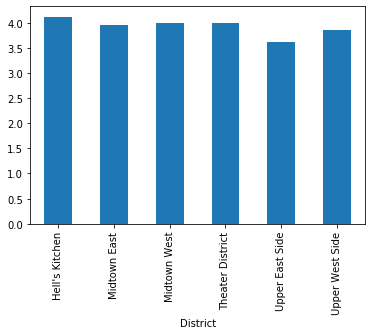

In [29]:
tb[tb['District']!=''].groupby('District').Ratings.mean().plot(kind='bar')



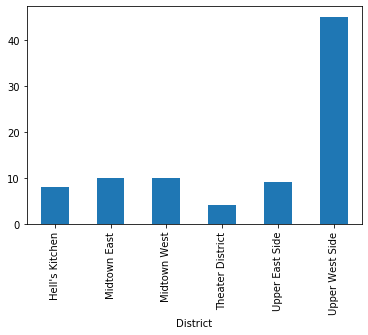

In [30]:
tb[tb['District']!=''].groupby('District').Ratings.count().plot(kind='bar')